In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv("cubic_zirconia.csv")  

In [4]:
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
df.shape

(26967, 10)

In [8]:
#Checking the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
#Checking the spread of the data:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [10]:
#Checking for missing values:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

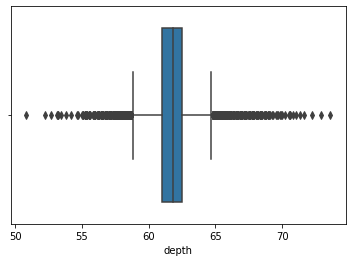

In [11]:
#Checking for outliers in 'depth' to decide what statistical value to be used for missing value imputation:
sns.boxplot(df['depth'])

In [12]:
#Imputing missing values in 'depth' with the mean:
mean = df['depth'].mean()
df['depth'] = df['depth'].fillna(mean)   

In [13]:
#Rechecking for missing values:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
#Rechecking the spread of data:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [15]:
#Checking for duplicate values:
df.duplicated().sum()

34

In [16]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [17]:
#Dropping duplicate values:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
#Checking for object datatypes:
df.select_dtypes(include='object').head(10)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
5,Ideal,D,VS2
6,Good,H,SI1
7,Premium,E,SI1
8,Good,H,SI1
9,Ideal,F,VS2


In [19]:
#Checking unique values for categorical variables:
for column in df[['cut', 'color', 'clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [20]:
#Converting object type, ordinal data to int by way of Label encoding:
code1={"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}
df["cut"]=df["cut"].replace(code1)

In [21]:
code2={"D":6 ,"E":5 , "F":4 , "G":3 , "H":2 , "I":1 ,"J":0}
df["color"]=df["color"].replace(code2)

In [22]:
code3={"IF":7 , "VVS1":6 , "VVS2":5 , "VS1":4 , "VS2":3 , "SI1":2 , "SI2":1 , "I1":0}
df["clarity"]=df["clarity"].replace(code3)


In [23]:
#Cross-checking the ordinal coding:
for column in df[['cut', 'color', 'clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
0      780
1     2435
2     6027
3     6886
4    10805
Name: cut, dtype: int64


COLOR :  7
0    1440
1    2765
6    3341
2    4095
4    4723
5    4916
3    5653
Name: color, dtype: int64


CLARITY :  8
0     364
7     891
6    1839
5    2530
4    4087
1    4564
3    6093
2    6565
Name: clarity, dtype: int64




In [24]:
#checking data types after transformation:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [25]:
df["price"].nunique()

8742

Shape before Outliers Treatment (26933, 10)


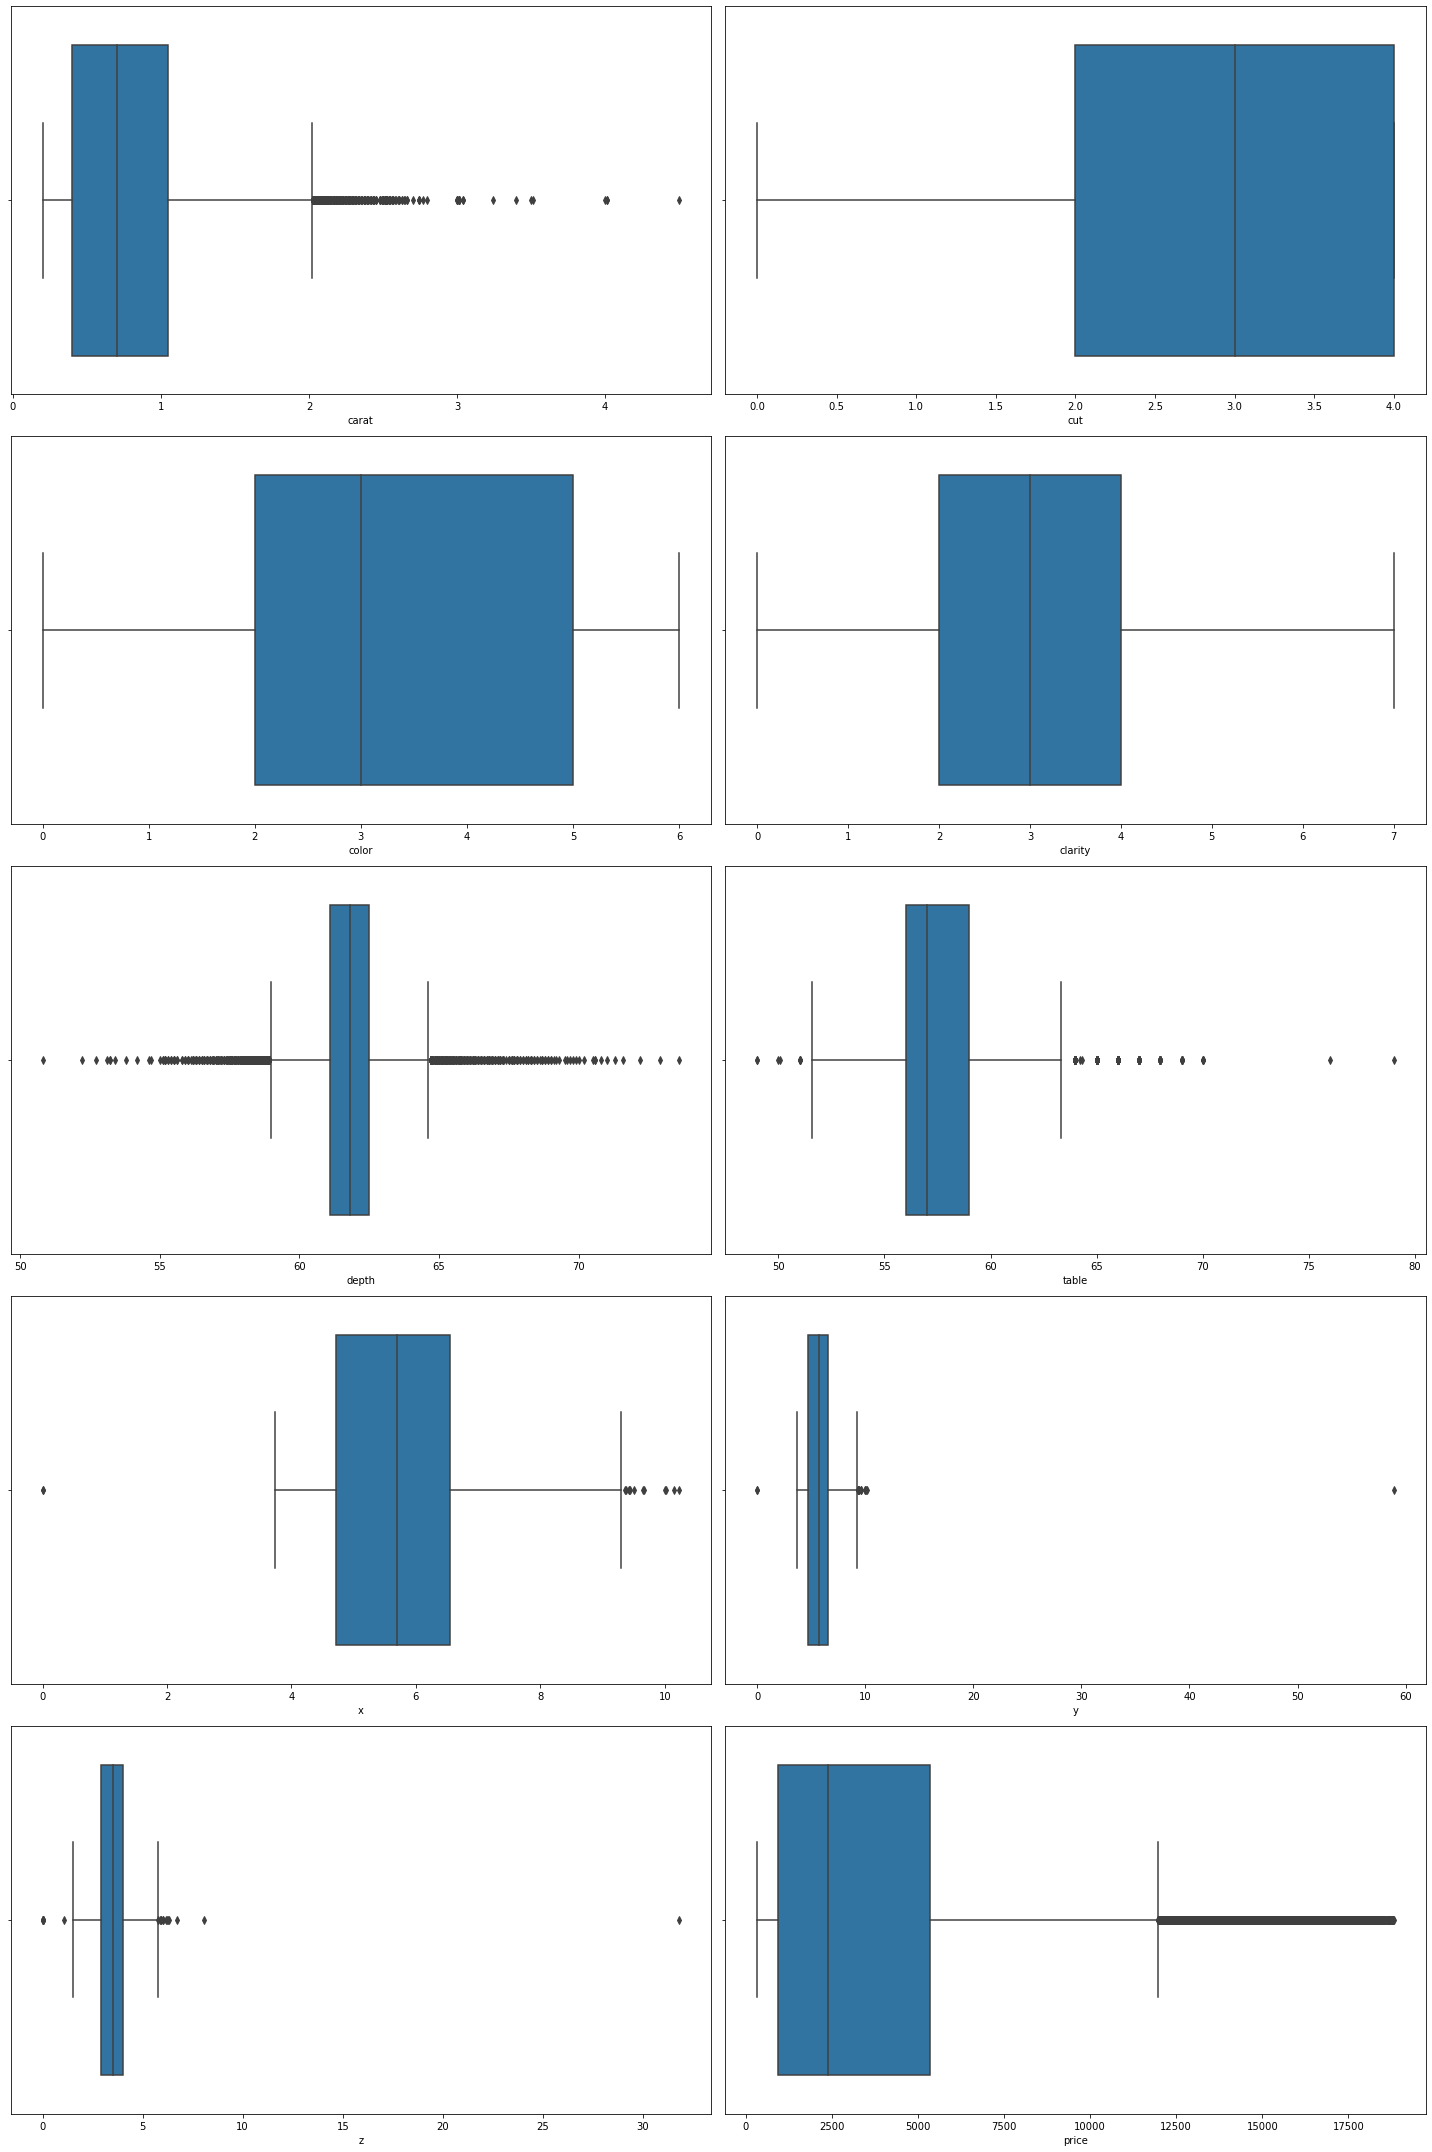

In [26]:
#Checking for outliers:
fig=plt.figure(figsize=(20,30))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df.shape)


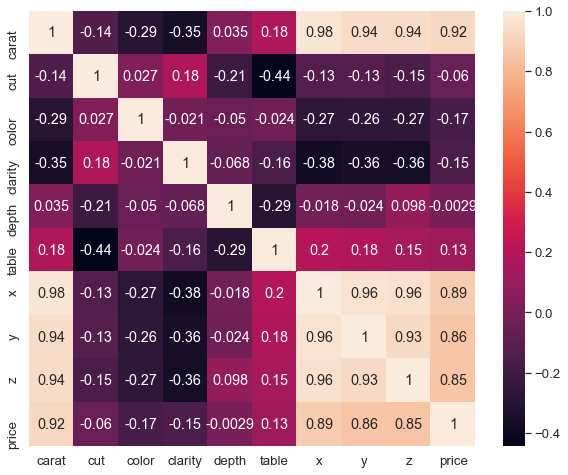

In [27]:
#Checking correlation between the variables:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [28]:
#Treating the outliers:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Shape After Outliers Treatment (26933, 10)


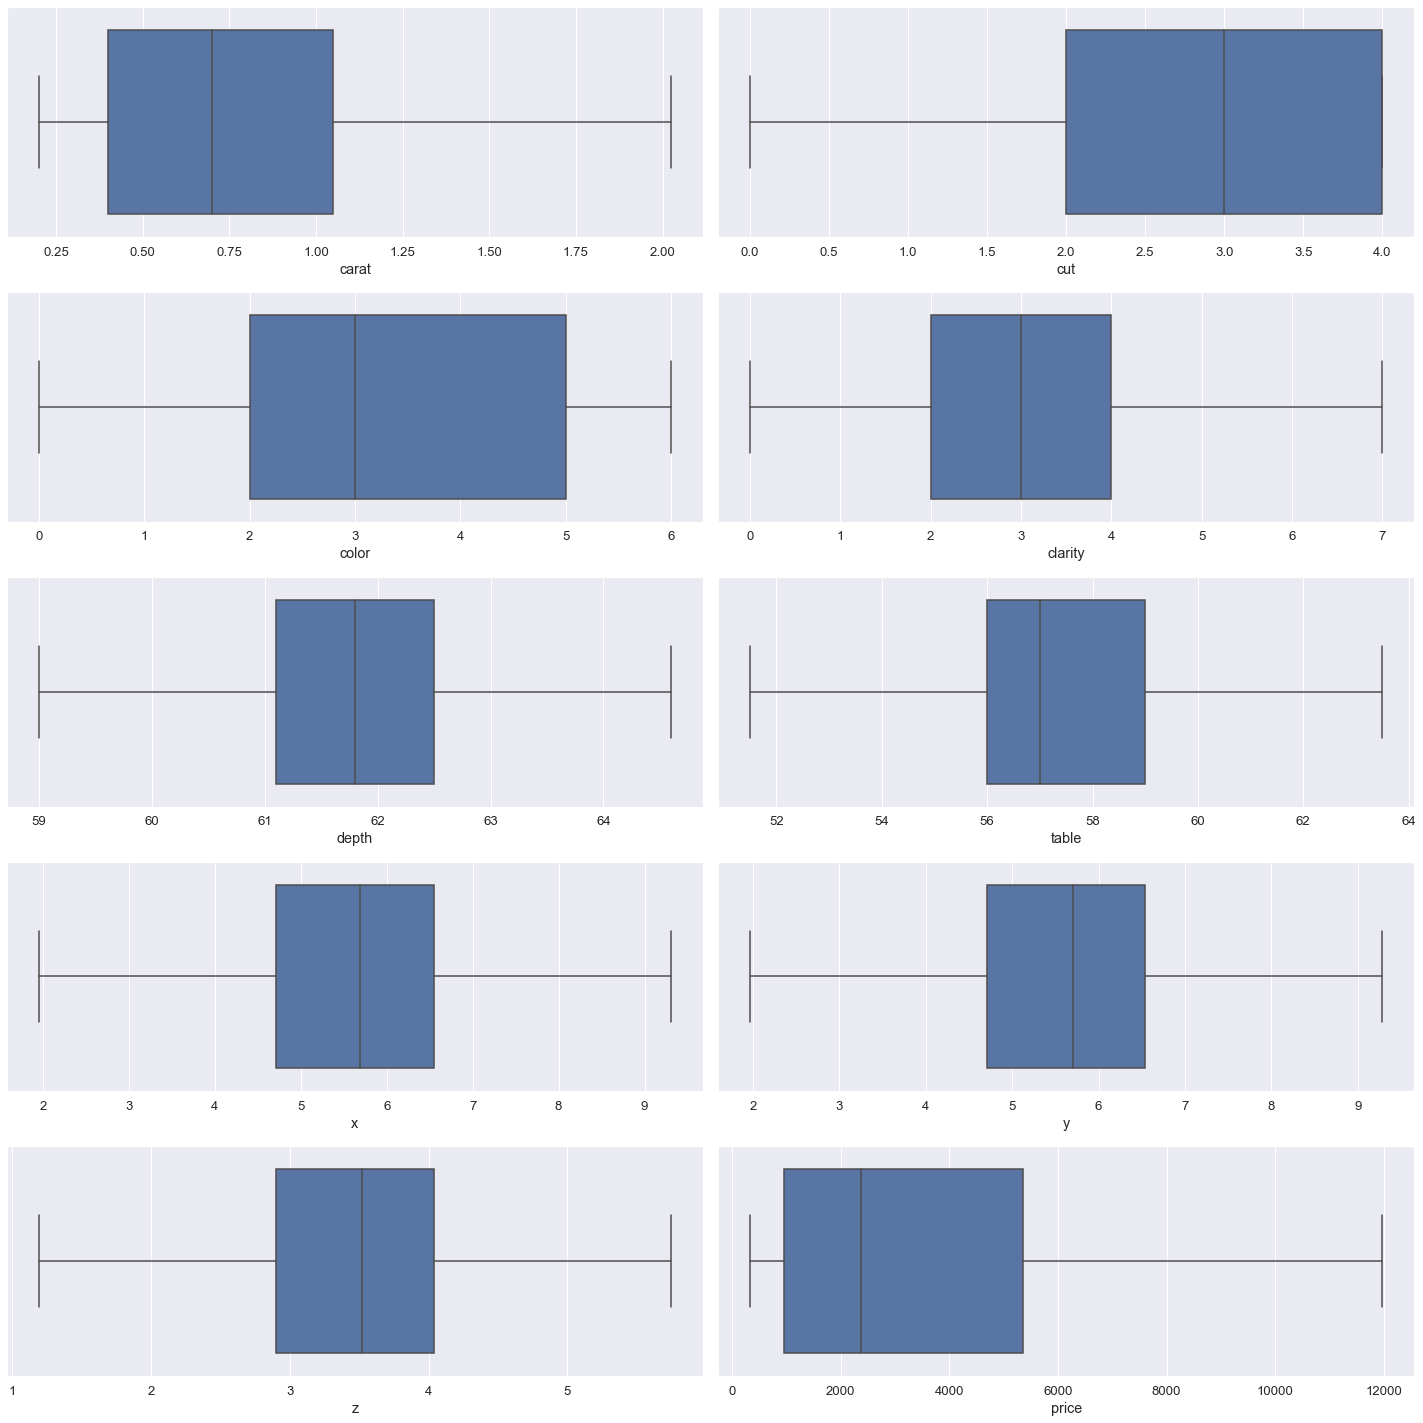

In [30]:
fig=plt.figure(figsize=(20,20))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',df.shape)

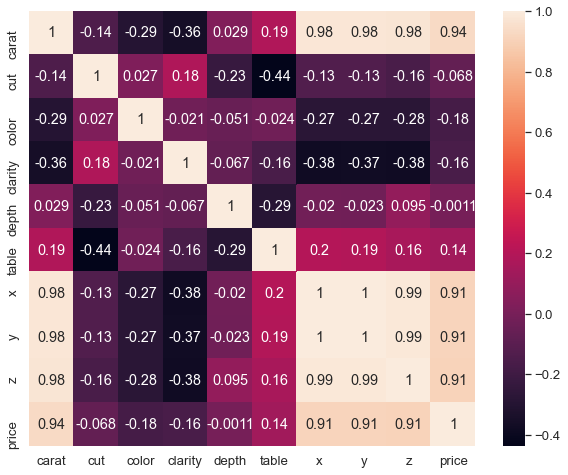

In [31]:
#Checking correlation post outlier treatment:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True,)
plt.show()

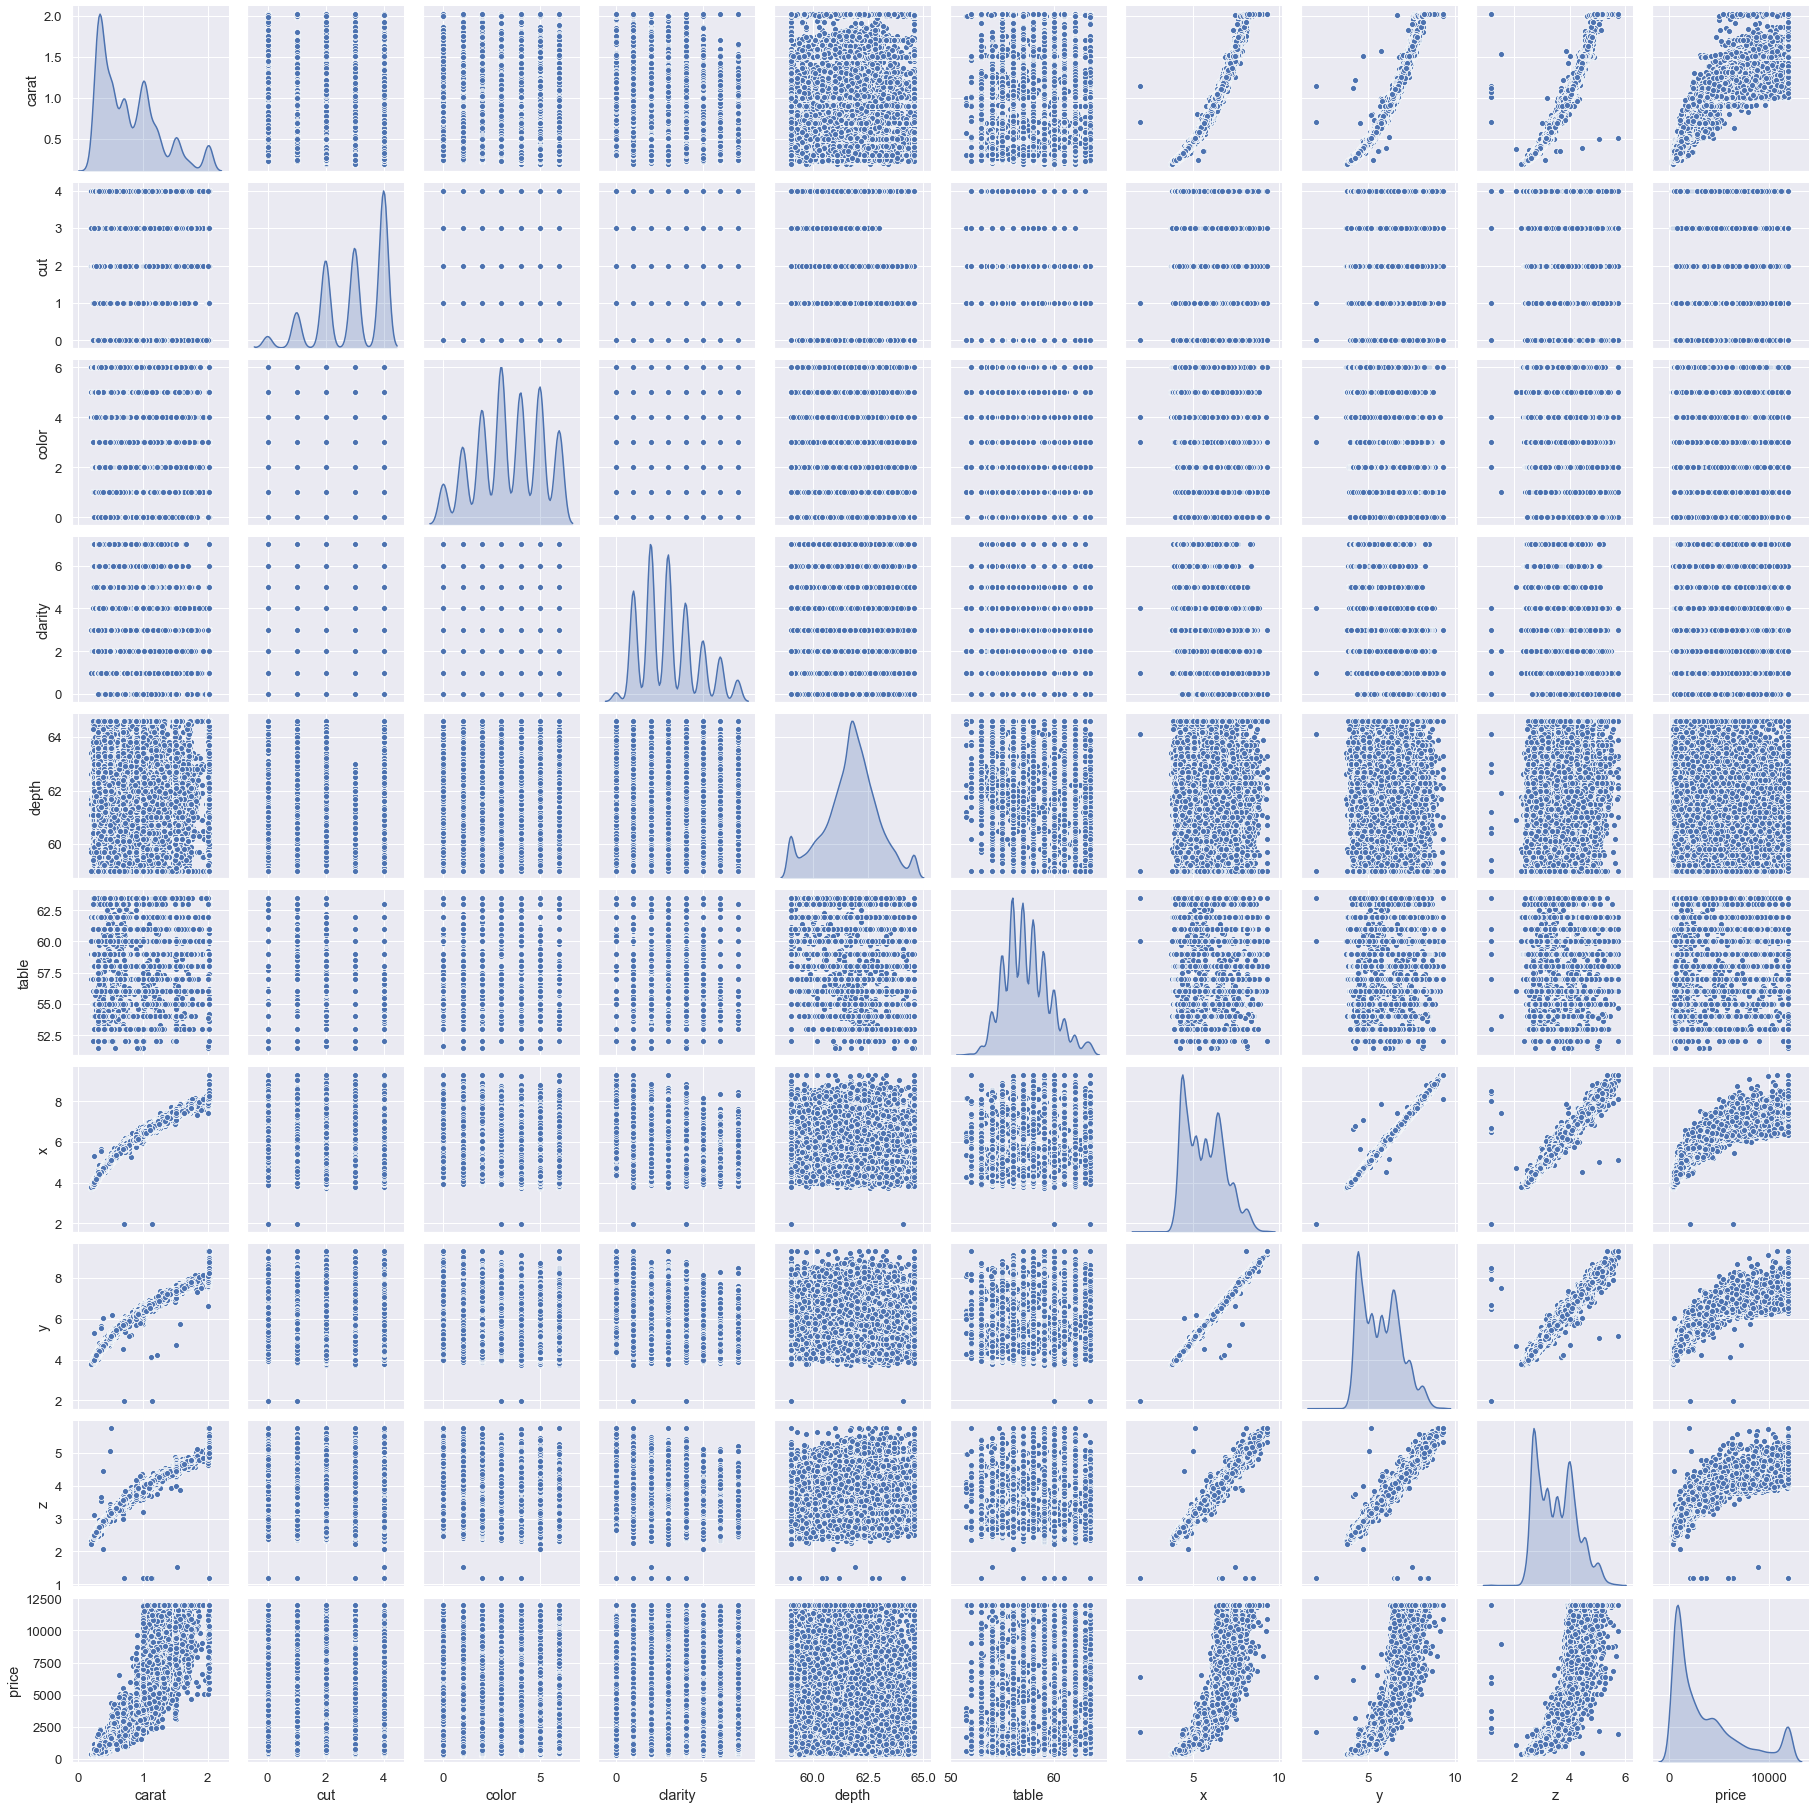

In [32]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

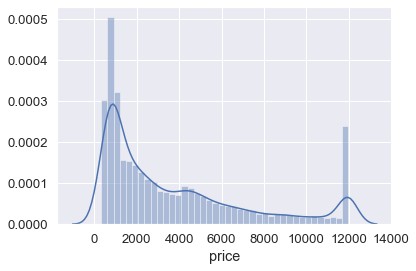

In [33]:
sns.distplot(df["price"])

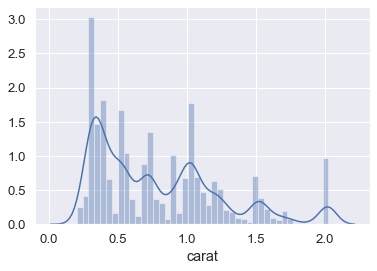

In [34]:
sns.distplot(df["carat"])

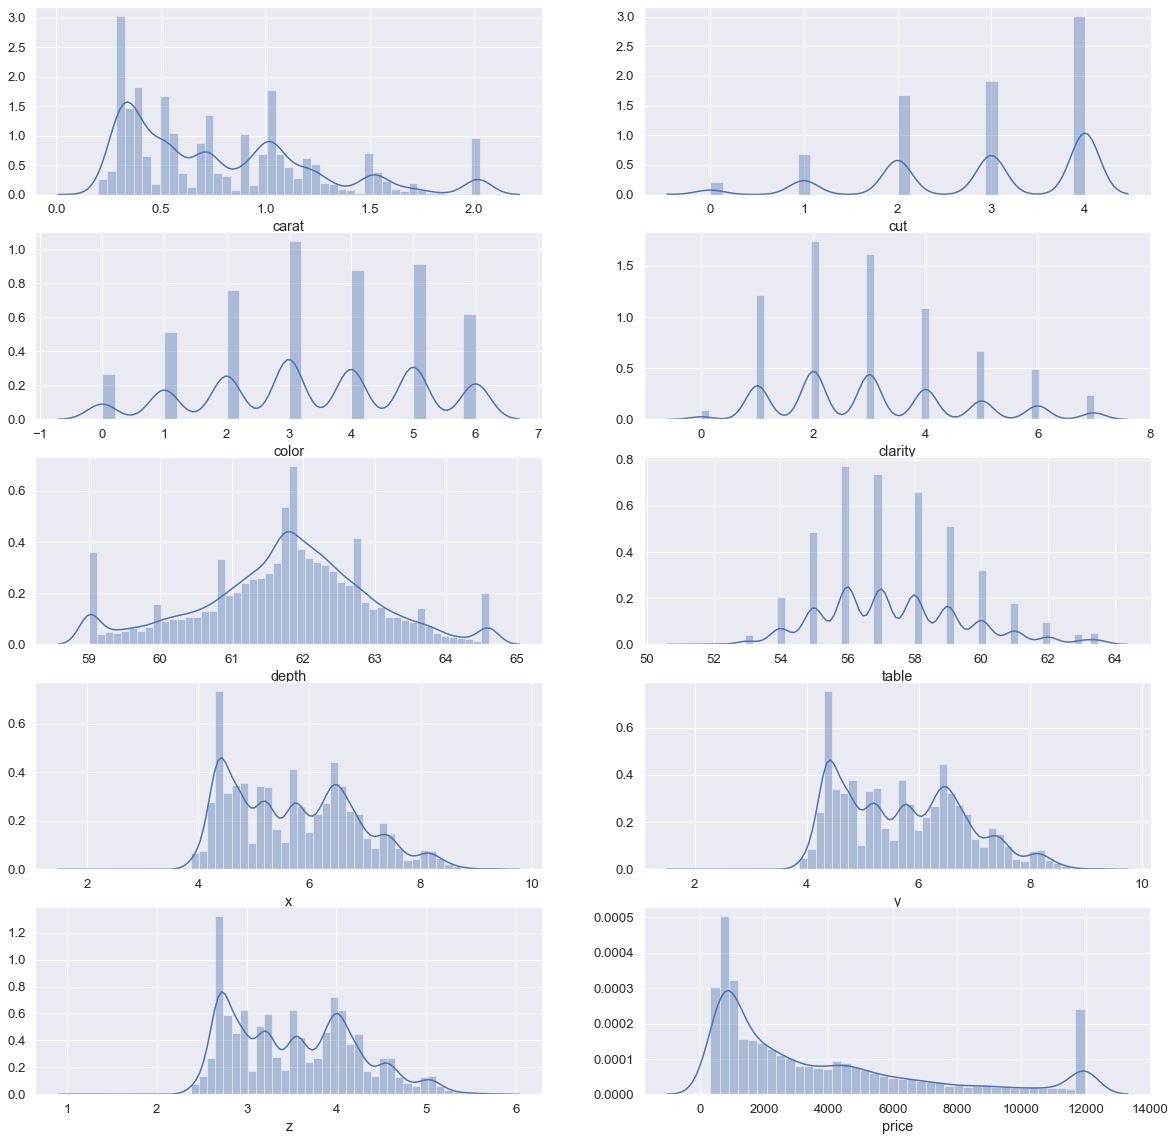

In [35]:
fig=plt.figure(figsize=(20,20))
for i, column in enumerate(df.columns,1):
    plt.subplot(5,2,i)
    sns.distplot(df[column])

In [36]:
#Splitting the data into train and test sets:
x = df.drop('price', axis=1)
y = df[['price']]

In [37]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [38]:
#Splitting in the 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [39]:
#Building the LR model:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [40]:
#Checking the coefficients for each feature:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8830.041263062534
The coefficient for cut is 110.85454043015193
The coefficient for color is 278.0046849488585
The coefficient for clarity is 440.5601072817639
The coefficient for depth is -7.410204433429112
The coefficient for table is -12.341576062261746
The coefficient for x is -1412.6208736112656
The coefficient for y is 1247.6796006371344
The coefficient for z is -312.8240720164206


In [41]:
#Finding the intercept value:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2661.1521021140034


In [42]:
#Calculating R2 on training data:
regression_model.score(x_train, y_train)
#93% of variation in price is explained by predictors in training set

0.9311670460854459

In [44]:
#Calculating R2 on test data:
regression_model.score(x_test, y_test)

0.931211447014315

In [46]:
#Calculating RSME on training data:
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

909.2450835680634

In [47]:
#Calculating RSME on test data:
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.1428733157

In [48]:
#Using statsmodel to draw further statistics:
data_train = pd.concat([x_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2.0,2.0,3.0,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4.0,5.0,3.0,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4.0,3.0,2.0,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3.0,4.0,1.0,61.1,62.0,6.54,6.49,3.98,4057.0


In [49]:
#Computing intercept and coefficients:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -2661.152102
carat        8830.041263
cut           110.854540
color         278.004685
clarity       440.560107
depth          -7.410204
table         -12.341576
x           -1412.620874
y            1247.679601
z            -312.824072
dtype: float64

In [50]:
#Printing the inferential statistics:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:54:35   Log-Likelihood:            -1.5519e+05
No. Observations:               18853   AIC:                         3.104e+05
Df Residuals:                   18843   BIC:                         3.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2661.1521    703.794     -3.781      0.0

In [52]:
#calculatinf MSE and RMSE on test data:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)

import math

math.sqrt(mse)

911.142873315701

In [53]:
# so there is avg of 911.0 (roundoff) mpg difference from real mpg on an avg

In [54]:
#Finding R2 on test data:
regression_model.score(x_test, y_test)

0.931211447014315

In [55]:
#Predicting price for a sample data (not in train/test):
y_pred = regression_model.predict(x_test)

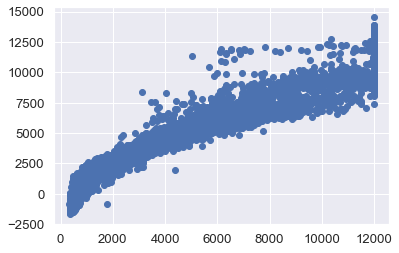

In [57]:
#Plot of predicted y values on sample data v/s y values on test data:
plt.scatter(y_test['price'], y_pred)


In [58]:
# Scaling the data (using z-score) to see if there will be any improvements in model performance:

from scipy.stats import zscore

x_train_scaled  = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [59]:
#Using LR to find the best fit model on training data:
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [60]:
#Finding coefficients and intercept:

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.172329431287857
The coefficient for cut is 0.03538735470122265
The coefficient for color is 0.1366674976657394
The coefficient for clarity is 0.2095298895319118
The coefficient for depth is -0.0025877372230944276
The coefficient for table is -0.007669299150525637
The coefficient for x is -0.45739268120861276
The coefficient for y is 0.4011897227360788
The coefficient for z is -0.06267063638166011


In [61]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.3651233618934012e-16


In [83]:
#Finding R2 on training data:
train_score=regression_model.score(x_train_scaled, y_train_scaled)
train_score

0.9311670460854459

In [84]:
#Finding R2 on test data:
test_score=regression_model.score(x_test_scaled, y_test_scaled)
test_score

0.9311987888967652

In [81]:
#Finding RSME on training data:

mse = np.mean((regression_model.predict(x_train_scaled)-y_train_scaled)**2)
import math
rmse_train=math.sqrt(mse)
rmse_train

0.2623603512624462

In [82]:
#Finding RSME on test data:

mse = np.mean((regression_model.predict(x_test_scaled)-y_test_scaled)**2)
import math
rmse_test=math.sqrt(mse)
rmse_test

0.262299849605818

In [88]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':train_score,'Test Score': test_score},index=['Linear Regression']))

                   Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression     0.26236     0.2623        0.931167    0.931199


In [65]:
#Predicting price for a sample data (not in train/test):
y_pred = regression_model.predict(x_test_scaled)

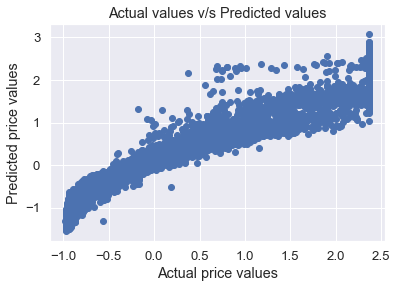

In [67]:
#Plot of predicted y values on sample data v/s y values on test data:
plt.xlabel('Actual price values')
plt.ylabel('Predicted price values')
plt.title('Actual values v/s Predicted values')
plt.scatter(y_test_scaled['price'], y_pred)

In [72]:
#Using statsmodel to draw further statistics:
data_train = pd.concat([x_train_scaled, y_train_scaled], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,-0.983742,-0.826474,-0.819083,-0.034626,0.539111,1.194109,-1.175731,-1.158718,-1.119070,-0.923160
2275,-1.070676,0.981336,0.941779,-0.034626,-0.452425,-1.127570,-1.229200,-1.275376,-1.277503,-0.834576
19183,-0.636006,0.981336,-0.232129,-0.641330,0.621739,-0.198899,-0.569745,-0.611323,-0.528546,-0.720311
5030,0.668006,-1.730378,0.941779,-1.248033,1.282764,-0.663234,0.713519,0.761649,0.882949,0.094835
25414,0.494138,0.077431,0.354825,-1.248033,-0.535053,2.122780,0.722431,0.680886,0.638098,0.092527


In [73]:
#Computing intercept and coefficients on scaled data:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    1.752342e-17
carat        1.172329e+00
cut          3.538735e-02
color        1.366675e-01
clarity      2.095299e-01
depth       -2.587737e-03
table       -7.669299e-03
x           -4.573927e-01
y            4.011897e-01
z           -6.267064e-02
dtype: float64

In [74]:
#Printing the inferential statistics:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:08:13   Log-Likelihood:                -1525.2
No. Observations:               18853   AIC:                             3070.
Df Residuals:                   18843   BIC:                             3149.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.752e-17      0.002   9.17e-15      1.0

In [75]:
#Finding the final linear equation for price variable:

for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.17) * carat + (0.04) * cut + (0.14) * color + (0.21) * clarity + (-0.0) * depth + (-0.01) * table + (-0.46) * x + (0.4) * y + (-0.06) * z + 

In [76]:
#Checking Variation Inflation Factor to check for multicollinearity in data:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 113.04347844402126
cut ---> 9.740579581543939
color ---> 5.543478567480492
clarity ---> 5.423435221377125
depth ---> 956.9981408164936
table ---> 756.890997943282
x ---> 10286.72078562022
y ---> 9325.5050987098
z ---> 1981.541208518107
